In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [226]:
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
sns.set()

In [42]:
data = pd.read_csv("../Bike_Buyer_Data_edited.txt")

In [43]:
data.shape

(1000, 14)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
ID                  1000 non-null int64
Marital Status      999 non-null object
Gender              999 non-null object
Income              1000 non-null object
Children            1000 non-null int64
Education           999 non-null object
Occupation          1000 non-null object
Home Owner          1000 non-null object
Cars                1000 non-null object
Commute Distance    1000 non-null object
Region              999 non-null object
Age                 1000 non-null object
Purchased Bike      1000 non-null object
Unnamed: 13         1 non-null object
dtypes: int64(2), object(12)
memory usage: 109.5+ KB


In [45]:
data.drop("ID", axis =1, inplace=True)
data.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Unnamed: 13
0,Married,Male,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes,NaN
1,Married,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,30,No,NaN
2,Single,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,35,No,NaN
3,Single,Male,10000,0,Partial College,Manual,Yes,1,1-2 Miles,Pacific,26,Yes,NaN
4,Single,Male,10000,0,Graduate Degree,Manual,No,0,0-1 Miles,Europe,30,Yes,NaN


In [46]:
data.rename(columns = {"Marital Status": "MaritalStatus",
                       "Home Owner": "HomeOwner",
                       "Commute Distance": "CommuteDistance",
                       "Purchased Bike": "PurchasedBike"}, inplace = True)

In [47]:
categorical_cols = ["MaritalStatus", "Gender", "Occupation", "HomeOwner", "Region"]
ordinal_cols = ["Education", "CommuteDistance"]
numerical_cols = ["Income", "Age", "Children", "Cars",]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
MaritalStatus      999 non-null object
Gender             999 non-null object
Income             1000 non-null object
Children           1000 non-null int64
Education          999 non-null object
Occupation         1000 non-null object
HomeOwner          1000 non-null object
Cars               1000 non-null object
CommuteDistance    1000 non-null object
Region             999 non-null object
Age                1000 non-null object
PurchasedBike      1000 non-null object
Unnamed: 13        1 non-null object
dtypes: int64(1), object(12)
memory usage: 101.7+ KB


In [49]:
data.CommuteDistance.value_counts()

0-1 Miles     365
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
2               1
Name: CommuteDistance, dtype: int64

In [50]:
data.loc[data["Unnamed: 13"].notnull()]

,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike,Unnamed: 13
8,NaN,Married,Male,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,33,No


In [51]:
data.loc[data["CommuteDistance"]=="2"] = data.loc[data["CommuteDistance"]=="2"].shift(-1, axis = 1)

In [52]:
data.loc[data["Unnamed: 13"].notnull()]

,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike,Unnamed: 13


In [53]:
data.drop("Unnamed: 13", inplace = True, axis = 1)

In [54]:
data["PurchasedBike"].value_counts()

No     519
Yes    481
Name: PurchasedBike, dtype: int64

In [55]:
target_dict = {"Yes":1, "No":0}
data["target"] = data["PurchasedBike"].apply(lambda x: target_dict[x])
data.drop("PurchasedBike", axis =1, inplace=True)

In [56]:
data[data.isnull().any(axis=1)][["Gender", "Children", "Education", "Region"]].head()

,Gender,Children,Education,Region
8,Male,NaN,Partial High School,Europe
246,Female,0.0,NaN,Pacific
271,Male,0.0,Graduate Degree,NaN
328,NaN,1.0,Bachelors,North America


In [210]:
data.dropna(axis =0, how = "any", inplace = True)

In [57]:
data["Cars"].value_counts()

2     345
1     267
0     242
3      85
4      60
-1      1
Name: Cars, dtype: int64

In [58]:
data.loc[data["Cars"]=="-1", "Cars"] = None

In [59]:
data["Cars"].value_counts()

2    345
1    267
0    242
3     85
4     60
Name: Cars, dtype: int64

In [60]:
commute_dict = {
    "0-1 Miles" : 1,
    "1-2 Miles" : 2,
    "2-5 Miles" : 3,
    "5-10 Miles" : 4,
    "10+ Miles" : 5
}

In [61]:
data["CommuteDistance"].value_counts()

0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: CommuteDistance, dtype: int64

# Visualisation

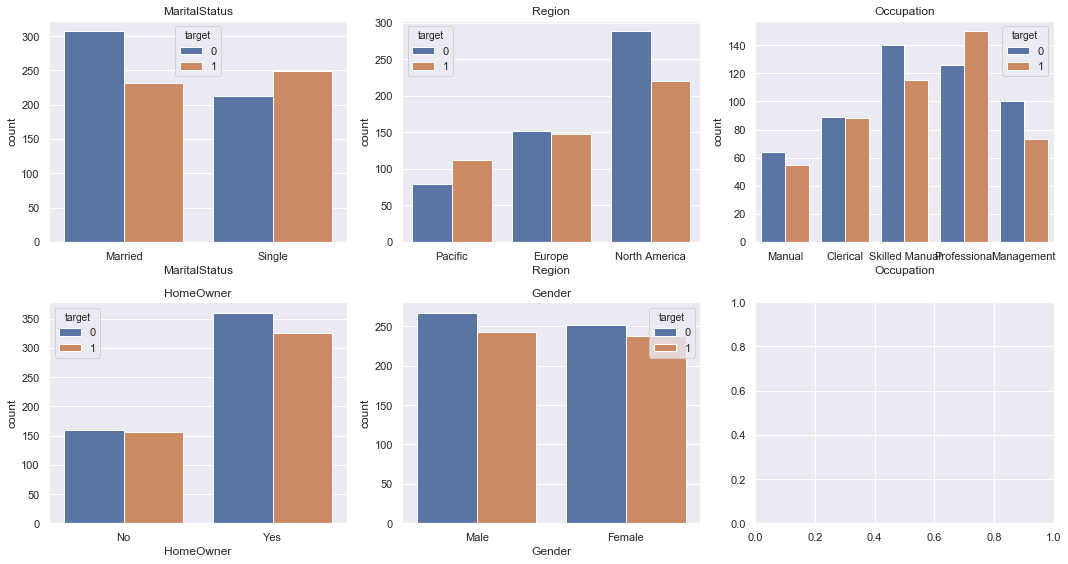

In [197]:
fig, axs = plt.subplots(2,3,figsize=(15,8))

for i in range(len(categorical_cols)):
    sns.countplot(data[categorical_cols[i]], hue=data["target"], ax = axs[i%2, i%3])
    axs[i%2, i%3].set_title(categorical_cols[i])
    
plt.tight_layout()

More than half of single customers bought a bike. Grow the single customer base?

A bigger percentage of pacific coast customers bought bike, but in straight up number north america had better sales

Skilled manual and professionals are the largest customer base, but professionals are more likely to buy. Target at work functions? Team building?

Homeowners are bigger client base but this doesnt seem useful for predicitng their purchases

Simlarly male and female customers to not seem to indicate liklihood to buy.

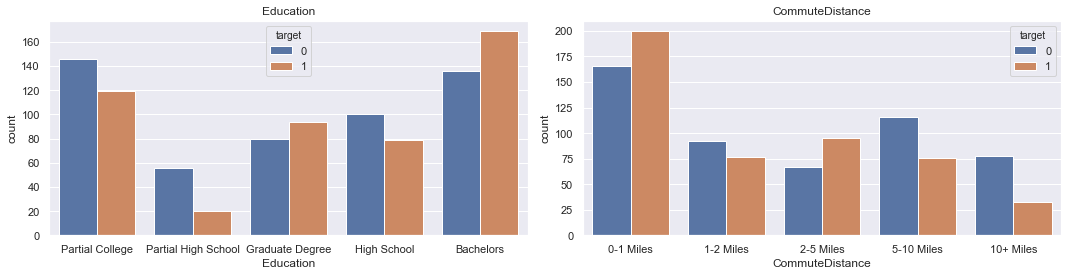

In [200]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

for i in range(len(ordinal_cols)):
    sns.countplot(data[ordinal_cols[i]], hue=data["target"], ax = axs[i%2])
    axs[i%2].set_title(ordinal_cols[i])
    
plt.tight_layout()

Bachelors earners are the largest customer segment, and bought the most bikes. Advertise at graduations?


People with shorter commute distances are larger customer segment and they are more likely to buy bikes.

In [65]:
for col in numerical_cols:
    data[[col]] = pd.to_numeric(data[col])

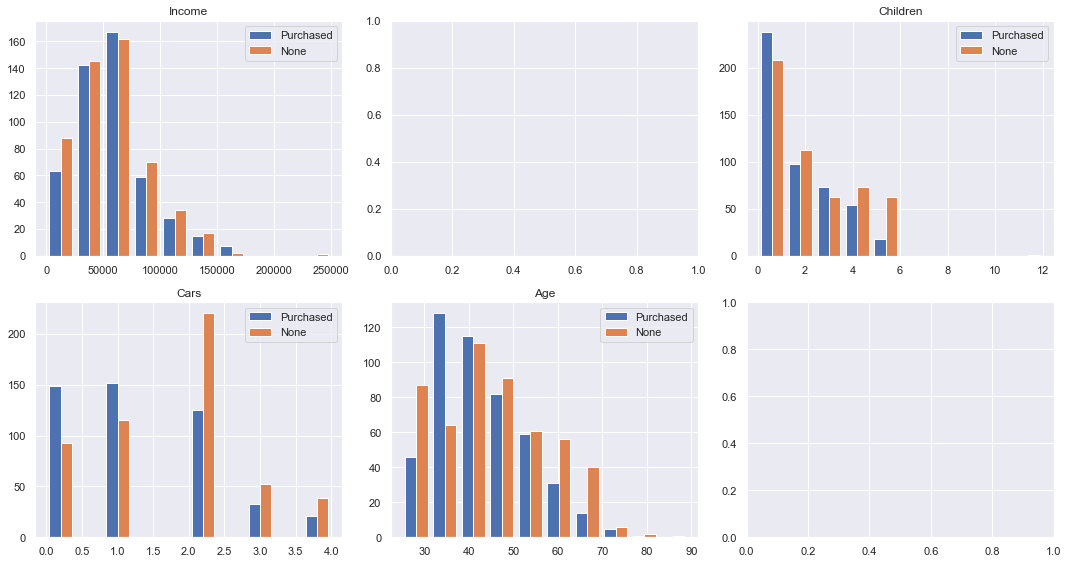

In [161]:
fig, axs = plt.subplots(2,3,figsize=(15,8))

for i in range(len(numerical_cols)):
    axs[i%2, i%3].hist([data[data["target"]==1][numerical_cols[i]], data[data["target"]==0][numerical_cols[i]]], label = ["Purchased", "None"])
    axs[i%2, i%3].set_title(numerical_cols[i])    
    axs[i%2, i%3].legend()
    
plt.tight_layout()

People with fewer children tended to buy bikes

People with 1 or no cars were a large segments and bought the largest portion of bikes

From 35 to 40 is the biggest proportion of customers to buy a bike.

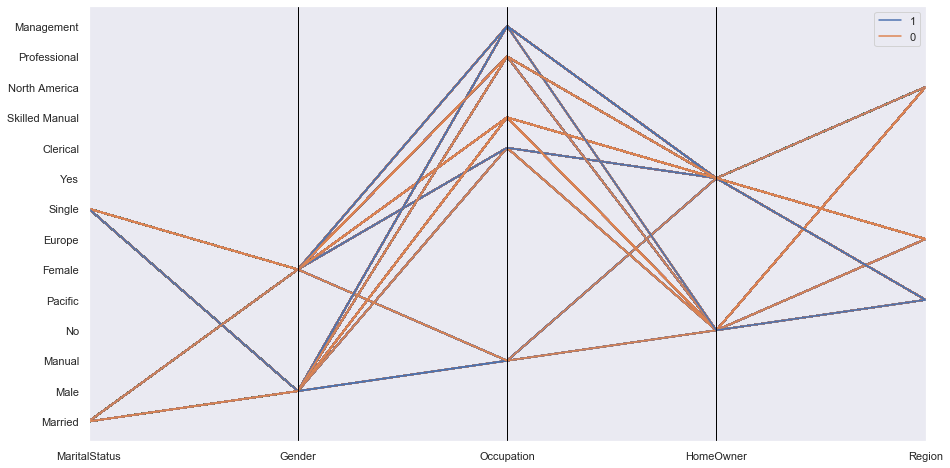

In [221]:
from pandas.plotting import parallel_coordinates

def pcoord_viz(df, labels):
    plt.figure(figsize = (15,8))
    fig = parallel_coordinates(df, labels, color=sns.color_palette())

    plt.show()

pcoord_viz(data[categorical_cols + ["target"]],'target')

# Some methods

In [126]:
def cross_validate_sklearn_model(model, X_train, y_train):
    cv_results = cross_validate(model, X_train, y_train, cv =5, scoring = 'accuracy')
    return cv_results

def search_hyperparameters_sklearn_model(model, X_train, y_train, hyperparameters):
    rscv = RandomizedSearchCV(model, hyperparameters, scoring = 'accuracy', random_state = 101, n_iter = 25, cv = 5, verbose = 3, n_jobs = -1, return_train_score = False)
    rscv.fit(X_train, y_train)
    
    return rscv.cv_results_, rscv.best_params_

def report(results, n_top=3):
    output = 'Report \n\n'
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            output+="Model with rank: {0} \n".format(i)
            output+= "Mean validation score: {0:.3f} (std: {1:.3f}) \n".format(results['mean_test_score'][candidate],results['std_test_score'][candidate])
            output += "Parameters: {0} \n\n".format(results['params'][candidate])
            
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format( results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
    return output

# First Stab: Logistic Regression

In [116]:
df = pd.get_dummies(data, columns = ordinal_cols+categorical_cols)

In [117]:
features = df.drop("target", axis =1)
target = df["target"]

In [118]:
X, test_features, y, test_target = train_test_split(features, target, test_size = 1/3, random_state =42)

In [119]:
lr = LogisticRegression(solver = "lbfgs")
cv_results = cross_validate_sklearn_model(lr, X, y)
cv_results

{'fit_time': array([0.01604605, 0.01701236, 0.01000071, 0.0099988 , 0.00799918]),
 'score_time': array([0.00199842, 0.00200057, 0.00200129, 0.00100255, 0.0010047 ]),
 'test_score': array([0.63432836, 0.57894737, 0.53030303, 0.53787879, 0.57575758])}

# RandomForest

In [120]:
rf = RandomForestClassifier(n_estimators = 100)
cv_results = cross_validate_sklearn_model(rf, X, y)
cv_results

{'fit_time': array([0.14699936, 0.09999919, 0.09200072, 0.09100056, 0.0899992 ]),
 'score_time': array([0.00899792, 0.00799751, 0.00799966, 0.00800037, 0.0079999 ]),
 'test_score': array([0.71641791, 0.69172932, 0.6969697 , 0.72727273, 0.72727273])}

In [222]:
rf = RandomForestClassifier(n_estimators = 100)

hyperparameters = {
    "n_estimators":randint(10, 100, 200), 
    "criterion":["gini", "entropy"], 
    "max_depth":randint(10, 20, 50), 
    "min_samples_split":randint(5, 15), 
    "min_samples_leaf":randint(1, 8), 
    "max_features":randint(1,8), 
    "bootstrap":[False]}

results, best_params = search_hyperparameters_sklearn_model(rf, X, y, hyperparameters)
report_str = report(results, n_top=5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.7s finished


Model with rank: 1
Mean validation score: 0.715 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 61, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 273}

Model with rank: 2
Mean validation score: 0.709 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 60, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 285}

Model with rank: 3
Mean validation score: 0.706 (std: 0.029)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 66, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 297}

Model with rank: 4
Mean validation score: 0.704 (std: 0.052)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 68, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 238}

Model with rank: 5
Mean validation score: 0.701 (std: 0.038)
Parameters: {'bootstrap': False, 'criterion': 'ent

In [224]:
cb = CatBoostClassifier()
cv_results = cross_validate_sklearn_model(cb, X, y)
cv_results

Learning rate set to 0.013991
0:	learn: 0.6914386	total: 112ms	remaining: 1m 51s
1:	learn: 0.6894811	total: 148ms	remaining: 1m 14s
2:	learn: 0.6873674	total: 181ms	remaining: 1m
3:	learn: 0.6851228	total: 220ms	remaining: 54.8s
4:	learn: 0.6832917	total: 247ms	remaining: 49.2s
5:	learn: 0.6814768	total: 272ms	remaining: 45.1s
6:	learn: 0.6789260	total: 304ms	remaining: 43.1s
7:	learn: 0.6761357	total: 332ms	remaining: 41.2s
8:	learn: 0.6749878	total: 355ms	remaining: 39.1s
9:	learn: 0.6730589	total: 379ms	remaining: 37.5s
10:	learn: 0.6709749	total: 411ms	remaining: 37s
11:	learn: 0.6693121	total: 438ms	remaining: 36.1s
12:	learn: 0.6668182	total: 467ms	remaining: 35.4s
13:	learn: 0.6649495	total: 494ms	remaining: 34.8s
14:	learn: 0.6630776	total: 522ms	remaining: 34.3s
15:	learn: 0.6609294	total: 551ms	remaining: 33.9s
16:	learn: 0.6602748	total: 573ms	remaining: 33.1s
17:	learn: 0.6584599	total: 607ms	remaining: 33.1s
18:	learn: 0.6566551	total: 633ms	remaining: 32.7s
19:	learn: 0.6

163:	learn: 0.5334656	total: 4.25s	remaining: 21.7s
164:	learn: 0.5331008	total: 4.29s	remaining: 21.7s
165:	learn: 0.5327387	total: 4.32s	remaining: 21.7s
166:	learn: 0.5326436	total: 4.35s	remaining: 21.7s
167:	learn: 0.5323725	total: 4.38s	remaining: 21.7s
168:	learn: 0.5322639	total: 4.4s	remaining: 21.6s
169:	learn: 0.5315422	total: 4.43s	remaining: 21.6s
170:	learn: 0.5308768	total: 4.46s	remaining: 21.6s
171:	learn: 0.5303429	total: 4.48s	remaining: 21.6s
172:	learn: 0.5296457	total: 4.52s	remaining: 21.6s
173:	learn: 0.5288743	total: 4.54s	remaining: 21.6s
174:	learn: 0.5282431	total: 4.57s	remaining: 21.6s
175:	learn: 0.5278796	total: 4.6s	remaining: 21.5s
176:	learn: 0.5274991	total: 4.63s	remaining: 21.5s
177:	learn: 0.5270741	total: 4.65s	remaining: 21.5s
178:	learn: 0.5268040	total: 4.68s	remaining: 21.5s
179:	learn: 0.5267046	total: 4.7s	remaining: 21.4s
180:	learn: 0.5265950	total: 4.73s	remaining: 21.4s
181:	learn: 0.5259874	total: 4.76s	remaining: 21.4s
182:	learn: 0.5

329:	learn: 0.4740304	total: 8.12s	remaining: 16.5s
330:	learn: 0.4738526	total: 8.14s	remaining: 16.5s
331:	learn: 0.4737935	total: 8.16s	remaining: 16.4s
332:	learn: 0.4737363	total: 8.17s	remaining: 16.4s
333:	learn: 0.4734878	total: 8.19s	remaining: 16.3s
334:	learn: 0.4731376	total: 8.22s	remaining: 16.3s
335:	learn: 0.4729311	total: 8.25s	remaining: 16.3s
336:	learn: 0.4727645	total: 8.27s	remaining: 16.3s
337:	learn: 0.4723832	total: 8.29s	remaining: 16.2s
338:	learn: 0.4723060	total: 8.3s	remaining: 16.2s
339:	learn: 0.4722977	total: 8.31s	remaining: 16.1s
340:	learn: 0.4720435	total: 8.34s	remaining: 16.1s
341:	learn: 0.4719147	total: 8.35s	remaining: 16.1s
342:	learn: 0.4715504	total: 8.37s	remaining: 16s
343:	learn: 0.4714788	total: 8.4s	remaining: 16s
344:	learn: 0.4713095	total: 8.41s	remaining: 16s
345:	learn: 0.4712142	total: 8.43s	remaining: 15.9s
346:	learn: 0.4705959	total: 8.46s	remaining: 15.9s
347:	learn: 0.4705649	total: 8.48s	remaining: 15.9s
348:	learn: 0.470087

492:	learn: 0.4406809	total: 11.9s	remaining: 12.3s
493:	learn: 0.4405371	total: 12s	remaining: 12.3s
494:	learn: 0.4403958	total: 12s	remaining: 12.3s
495:	learn: 0.4401559	total: 12.1s	remaining: 12.3s
496:	learn: 0.4400211	total: 12.1s	remaining: 12.3s
497:	learn: 0.4396969	total: 12.1s	remaining: 12.2s
498:	learn: 0.4396749	total: 12.2s	remaining: 12.2s
499:	learn: 0.4395560	total: 12.2s	remaining: 12.2s
500:	learn: 0.4393594	total: 12.2s	remaining: 12.2s
501:	learn: 0.4393552	total: 12.2s	remaining: 12.1s
502:	learn: 0.4392785	total: 12.2s	remaining: 12.1s
503:	learn: 0.4392510	total: 12.3s	remaining: 12.1s
504:	learn: 0.4392018	total: 12.3s	remaining: 12s
505:	learn: 0.4389564	total: 12.3s	remaining: 12s
506:	learn: 0.4389364	total: 12.3s	remaining: 12s
507:	learn: 0.4388839	total: 12.4s	remaining: 12s
508:	learn: 0.4384665	total: 12.4s	remaining: 11.9s
509:	learn: 0.4384625	total: 12.4s	remaining: 11.9s
510:	learn: 0.4383779	total: 12.4s	remaining: 11.9s
511:	learn: 0.4382545	to

655:	learn: 0.4178626	total: 16s	remaining: 8.38s
656:	learn: 0.4176400	total: 16s	remaining: 8.36s
657:	learn: 0.4175673	total: 16.1s	remaining: 8.34s
658:	learn: 0.4175321	total: 16.1s	remaining: 8.32s
659:	learn: 0.4174554	total: 16.1s	remaining: 8.3s
660:	learn: 0.4171665	total: 16.1s	remaining: 8.28s
661:	learn: 0.4171481	total: 16.2s	remaining: 8.26s
662:	learn: 0.4169352	total: 16.2s	remaining: 8.24s
663:	learn: 0.4169254	total: 16.2s	remaining: 8.21s
664:	learn: 0.4166367	total: 16.3s	remaining: 8.2s
665:	learn: 0.4165191	total: 16.3s	remaining: 8.18s
666:	learn: 0.4161408	total: 16.3s	remaining: 8.16s
667:	learn: 0.4154082	total: 16.4s	remaining: 8.13s
668:	learn: 0.4152952	total: 16.4s	remaining: 8.11s
669:	learn: 0.4148396	total: 16.4s	remaining: 8.1s
670:	learn: 0.4147399	total: 16.5s	remaining: 8.08s
671:	learn: 0.4145602	total: 16.5s	remaining: 8.06s
672:	learn: 0.4140085	total: 16.5s	remaining: 8.04s
673:	learn: 0.4136884	total: 16.6s	remaining: 8.02s
674:	learn: 0.41366

817:	learn: 0.3942654	total: 20.3s	remaining: 4.51s
818:	learn: 0.3937981	total: 20.3s	remaining: 4.49s
819:	learn: 0.3937641	total: 20.3s	remaining: 4.46s
820:	learn: 0.3937443	total: 20.4s	remaining: 4.44s
821:	learn: 0.3934052	total: 20.4s	remaining: 4.41s
822:	learn: 0.3933916	total: 20.4s	remaining: 4.39s
823:	learn: 0.3930130	total: 20.4s	remaining: 4.36s
824:	learn: 0.3929461	total: 20.5s	remaining: 4.34s
825:	learn: 0.3929390	total: 20.5s	remaining: 4.31s
826:	learn: 0.3929177	total: 20.5s	remaining: 4.29s
827:	learn: 0.3927608	total: 20.5s	remaining: 4.26s
828:	learn: 0.3924874	total: 20.6s	remaining: 4.24s
829:	learn: 0.3921548	total: 20.6s	remaining: 4.21s
830:	learn: 0.3921468	total: 20.6s	remaining: 4.19s
831:	learn: 0.3917477	total: 20.6s	remaining: 4.16s
832:	learn: 0.3917422	total: 20.6s	remaining: 4.14s
833:	learn: 0.3917154	total: 20.7s	remaining: 4.11s
834:	learn: 0.3916386	total: 20.7s	remaining: 4.09s
835:	learn: 0.3914440	total: 20.7s	remaining: 4.06s
836:	learn: 

983:	learn: 0.3719888	total: 24.1s	remaining: 392ms
984:	learn: 0.3718319	total: 24.1s	remaining: 367ms
985:	learn: 0.3717586	total: 24.1s	remaining: 343ms
986:	learn: 0.3717353	total: 24.2s	remaining: 318ms
987:	learn: 0.3717128	total: 24.2s	remaining: 294ms
988:	learn: 0.3717051	total: 24.2s	remaining: 269ms
989:	learn: 0.3717025	total: 24.2s	remaining: 245ms
990:	learn: 0.3715759	total: 24.2s	remaining: 220ms
991:	learn: 0.3715326	total: 24.3s	remaining: 196ms
992:	learn: 0.3714725	total: 24.3s	remaining: 171ms
993:	learn: 0.3714419	total: 24.3s	remaining: 147ms
994:	learn: 0.3714369	total: 24.3s	remaining: 122ms
995:	learn: 0.3712966	total: 24.4s	remaining: 97.8ms
996:	learn: 0.3712620	total: 24.4s	remaining: 73.3ms
997:	learn: 0.3712359	total: 24.4s	remaining: 48.9ms
998:	learn: 0.3712170	total: 24.4s	remaining: 24.4ms
999:	learn: 0.3709567	total: 24.4s	remaining: 0us
Learning rate set to 0.013999
0:	learn: 0.6907218	total: 18.7ms	remaining: 18.6s
1:	learn: 0.6876780	total: 42.9ms

151:	learn: 0.5310523	total: 3.51s	remaining: 19.6s
152:	learn: 0.5304112	total: 3.53s	remaining: 19.6s
153:	learn: 0.5297213	total: 3.56s	remaining: 19.5s
154:	learn: 0.5290573	total: 3.58s	remaining: 19.5s
155:	learn: 0.5283173	total: 3.6s	remaining: 19.5s
156:	learn: 0.5273919	total: 3.63s	remaining: 19.5s
157:	learn: 0.5272174	total: 3.65s	remaining: 19.4s
158:	learn: 0.5271551	total: 3.65s	remaining: 19.3s
159:	learn: 0.5266734	total: 3.68s	remaining: 19.3s
160:	learn: 0.5262211	total: 3.7s	remaining: 19.3s
161:	learn: 0.5257079	total: 3.73s	remaining: 19.3s
162:	learn: 0.5253238	total: 3.75s	remaining: 19.3s
163:	learn: 0.5248618	total: 3.78s	remaining: 19.3s
164:	learn: 0.5243354	total: 3.8s	remaining: 19.3s
165:	learn: 0.5242756	total: 3.81s	remaining: 19.2s
166:	learn: 0.5237088	total: 3.84s	remaining: 19.2s
167:	learn: 0.5231808	total: 3.87s	remaining: 19.2s
168:	learn: 0.5228980	total: 3.88s	remaining: 19.1s
169:	learn: 0.5219177	total: 3.91s	remaining: 19.1s
170:	learn: 0.5

312:	learn: 0.4656538	total: 7.49s	remaining: 16.4s
313:	learn: 0.4650225	total: 7.53s	remaining: 16.4s
314:	learn: 0.4646637	total: 7.56s	remaining: 16.4s
315:	learn: 0.4641349	total: 7.58s	remaining: 16.4s
316:	learn: 0.4636092	total: 7.62s	remaining: 16.4s
317:	learn: 0.4632392	total: 7.64s	remaining: 16.4s
318:	learn: 0.4630310	total: 7.68s	remaining: 16.4s
319:	learn: 0.4626620	total: 7.74s	remaining: 16.5s
320:	learn: 0.4625102	total: 7.78s	remaining: 16.5s
321:	learn: 0.4622843	total: 7.82s	remaining: 16.5s
322:	learn: 0.4621056	total: 7.87s	remaining: 16.5s
323:	learn: 0.4617695	total: 7.92s	remaining: 16.5s
324:	learn: 0.4612555	total: 7.97s	remaining: 16.6s
325:	learn: 0.4608539	total: 8.02s	remaining: 16.6s
326:	learn: 0.4608247	total: 8.04s	remaining: 16.5s
327:	learn: 0.4608192	total: 8.06s	remaining: 16.5s
328:	learn: 0.4608057	total: 8.08s	remaining: 16.5s
329:	learn: 0.4602244	total: 8.13s	remaining: 16.5s
330:	learn: 0.4601923	total: 8.15s	remaining: 16.5s
331:	learn: 

471:	learn: 0.4351512	total: 11.7s	remaining: 13.1s
472:	learn: 0.4346862	total: 11.8s	remaining: 13.1s
473:	learn: 0.4341654	total: 11.8s	remaining: 13.1s
474:	learn: 0.4337038	total: 11.8s	remaining: 13.1s
475:	learn: 0.4336019	total: 11.8s	remaining: 13s
476:	learn: 0.4335997	total: 11.9s	remaining: 13s
477:	learn: 0.4334474	total: 11.9s	remaining: 13s
478:	learn: 0.4333484	total: 11.9s	remaining: 13s
479:	learn: 0.4331947	total: 11.9s	remaining: 12.9s
480:	learn: 0.4323663	total: 12s	remaining: 12.9s
481:	learn: 0.4319819	total: 12s	remaining: 12.9s
482:	learn: 0.4316633	total: 12s	remaining: 12.9s
483:	learn: 0.4311885	total: 12.1s	remaining: 12.9s
484:	learn: 0.4311684	total: 12.1s	remaining: 12.8s
485:	learn: 0.4311679	total: 12.1s	remaining: 12.8s
486:	learn: 0.4311661	total: 12.1s	remaining: 12.8s
487:	learn: 0.4311507	total: 12.1s	remaining: 12.7s
488:	learn: 0.4311435	total: 12.2s	remaining: 12.7s
489:	learn: 0.4311291	total: 12.2s	remaining: 12.7s
490:	learn: 0.4311286	tota

632:	learn: 0.4144229	total: 15.3s	remaining: 8.88s
633:	learn: 0.4144058	total: 15.4s	remaining: 8.87s
634:	learn: 0.4143084	total: 15.4s	remaining: 8.85s
635:	learn: 0.4142999	total: 15.4s	remaining: 8.82s
636:	learn: 0.4142323	total: 15.4s	remaining: 8.8s
637:	learn: 0.4139483	total: 15.5s	remaining: 8.78s
638:	learn: 0.4139356	total: 15.5s	remaining: 8.75s
639:	learn: 0.4135067	total: 15.5s	remaining: 8.73s
640:	learn: 0.4134808	total: 15.6s	remaining: 8.71s
641:	learn: 0.4134596	total: 15.6s	remaining: 8.68s
642:	learn: 0.4132424	total: 15.6s	remaining: 8.66s
643:	learn: 0.4130848	total: 15.6s	remaining: 8.64s
644:	learn: 0.4130835	total: 15.6s	remaining: 8.61s
645:	learn: 0.4130175	total: 15.7s	remaining: 8.59s
646:	learn: 0.4130088	total: 15.7s	remaining: 8.56s
647:	learn: 0.4129881	total: 15.7s	remaining: 8.54s
648:	learn: 0.4127927	total: 15.7s	remaining: 8.52s
649:	learn: 0.4126828	total: 15.8s	remaining: 8.5s
650:	learn: 0.4126461	total: 15.8s	remaining: 8.47s
651:	learn: 0.

799:	learn: 0.3996260	total: 19.3s	remaining: 4.82s
800:	learn: 0.3995629	total: 19.3s	remaining: 4.79s
801:	learn: 0.3995581	total: 19.3s	remaining: 4.77s
802:	learn: 0.3995549	total: 19.3s	remaining: 4.74s
803:	learn: 0.3994637	total: 19.4s	remaining: 4.72s
804:	learn: 0.3991733	total: 19.4s	remaining: 4.7s
805:	learn: 0.3991716	total: 19.4s	remaining: 4.67s
806:	learn: 0.3989959	total: 19.4s	remaining: 4.65s
807:	learn: 0.3989954	total: 19.4s	remaining: 4.62s
808:	learn: 0.3989891	total: 19.5s	remaining: 4.59s
809:	learn: 0.3987125	total: 19.5s	remaining: 4.57s
810:	learn: 0.3985096	total: 19.5s	remaining: 4.55s
811:	learn: 0.3984076	total: 19.6s	remaining: 4.53s
812:	learn: 0.3984054	total: 19.6s	remaining: 4.5s
813:	learn: 0.3983918	total: 19.6s	remaining: 4.48s
814:	learn: 0.3983793	total: 19.6s	remaining: 4.45s
815:	learn: 0.3983773	total: 19.6s	remaining: 4.42s
816:	learn: 0.3983543	total: 19.6s	remaining: 4.4s
817:	learn: 0.3979156	total: 19.7s	remaining: 4.38s
818:	learn: 0.3

959:	learn: 0.3882569	total: 23.3s	remaining: 970ms
960:	learn: 0.3882294	total: 23.3s	remaining: 946ms
961:	learn: 0.3881341	total: 23.3s	remaining: 922ms
962:	learn: 0.3881332	total: 23.4s	remaining: 897ms
963:	learn: 0.3881329	total: 23.4s	remaining: 873ms
964:	learn: 0.3878230	total: 23.4s	remaining: 849ms
965:	learn: 0.3878205	total: 23.4s	remaining: 825ms
966:	learn: 0.3877654	total: 23.5s	remaining: 801ms
967:	learn: 0.3877630	total: 23.5s	remaining: 777ms
968:	learn: 0.3874765	total: 23.6s	remaining: 753ms
969:	learn: 0.3874523	total: 23.6s	remaining: 730ms
970:	learn: 0.3874499	total: 23.6s	remaining: 706ms
971:	learn: 0.3874046	total: 23.7s	remaining: 682ms
972:	learn: 0.3874023	total: 23.7s	remaining: 658ms
973:	learn: 0.3872860	total: 23.8s	remaining: 634ms
974:	learn: 0.3871566	total: 23.8s	remaining: 610ms
975:	learn: 0.3869889	total: 23.8s	remaining: 586ms
976:	learn: 0.3869113	total: 23.9s	remaining: 562ms
977:	learn: 0.3869091	total: 23.9s	remaining: 537ms
978:	learn: 

120:	learn: 0.5462678	total: 2.94s	remaining: 21.4s
121:	learn: 0.5455195	total: 2.97s	remaining: 21.4s
122:	learn: 0.5447489	total: 3s	remaining: 21.4s
123:	learn: 0.5440448	total: 3.02s	remaining: 21.4s
124:	learn: 0.5428790	total: 3.04s	remaining: 21.3s
125:	learn: 0.5418716	total: 3.07s	remaining: 21.3s
126:	learn: 0.5414895	total: 3.09s	remaining: 21.2s
127:	learn: 0.5409443	total: 3.11s	remaining: 21.2s
128:	learn: 0.5398335	total: 3.14s	remaining: 21.2s
129:	learn: 0.5393428	total: 3.17s	remaining: 21.2s
130:	learn: 0.5388188	total: 3.2s	remaining: 21.2s
131:	learn: 0.5388181	total: 3.22s	remaining: 21.2s
132:	learn: 0.5382566	total: 3.25s	remaining: 21.2s
133:	learn: 0.5379036	total: 3.27s	remaining: 21.2s
134:	learn: 0.5367234	total: 3.3s	remaining: 21.2s
135:	learn: 0.5363440	total: 3.34s	remaining: 21.2s
136:	learn: 0.5352225	total: 3.36s	remaining: 21.2s
137:	learn: 0.5341985	total: 3.39s	remaining: 21.2s
138:	learn: 0.5336590	total: 3.41s	remaining: 21.1s
139:	learn: 0.533

283:	learn: 0.4694229	total: 6.94s	remaining: 17.5s
284:	learn: 0.4691400	total: 6.96s	remaining: 17.5s
285:	learn: 0.4689054	total: 6.98s	remaining: 17.4s
286:	learn: 0.4686673	total: 7s	remaining: 17.4s
287:	learn: 0.4682727	total: 7.03s	remaining: 17.4s
288:	learn: 0.4681906	total: 7.04s	remaining: 17.3s
289:	learn: 0.4677489	total: 7.06s	remaining: 17.3s
290:	learn: 0.4676028	total: 7.08s	remaining: 17.2s
291:	learn: 0.4667961	total: 7.1s	remaining: 17.2s
292:	learn: 0.4665584	total: 7.12s	remaining: 17.2s
293:	learn: 0.4661214	total: 7.14s	remaining: 17.2s
294:	learn: 0.4652272	total: 7.16s	remaining: 17.1s
295:	learn: 0.4649130	total: 7.18s	remaining: 17.1s
296:	learn: 0.4647629	total: 7.2s	remaining: 17s
297:	learn: 0.4646895	total: 7.22s	remaining: 17s
298:	learn: 0.4643260	total: 7.24s	remaining: 17s
299:	learn: 0.4641146	total: 7.27s	remaining: 17s
300:	learn: 0.4639020	total: 7.29s	remaining: 16.9s
301:	learn: 0.4637600	total: 7.31s	remaining: 16.9s
302:	learn: 0.4635055	tot

445:	learn: 0.4358666	total: 10.8s	remaining: 13.4s
446:	learn: 0.4351527	total: 10.8s	remaining: 13.3s
447:	learn: 0.4350644	total: 10.8s	remaining: 13.3s
448:	learn: 0.4349704	total: 10.8s	remaining: 13.3s
449:	learn: 0.4349372	total: 10.8s	remaining: 13.2s
450:	learn: 0.4348208	total: 10.9s	remaining: 13.2s
451:	learn: 0.4348061	total: 10.9s	remaining: 13.2s
452:	learn: 0.4347910	total: 10.9s	remaining: 13.2s
453:	learn: 0.4342915	total: 10.9s	remaining: 13.1s
454:	learn: 0.4341038	total: 11s	remaining: 13.1s
455:	learn: 0.4336915	total: 11s	remaining: 13.1s
456:	learn: 0.4334706	total: 11s	remaining: 13.1s
457:	learn: 0.4334679	total: 11s	remaining: 13.1s
458:	learn: 0.4334663	total: 11.1s	remaining: 13s
459:	learn: 0.4334467	total: 11.1s	remaining: 13s
460:	learn: 0.4332263	total: 11.1s	remaining: 13s
461:	learn: 0.4329726	total: 11.1s	remaining: 13s
462:	learn: 0.4329545	total: 11.2s	remaining: 12.9s
463:	learn: 0.4327705	total: 11.2s	remaining: 12.9s
464:	learn: 0.4326943	total:

606:	learn: 0.4160450	total: 14.9s	remaining: 9.62s
607:	learn: 0.4159584	total: 14.9s	remaining: 9.6s
608:	learn: 0.4159486	total: 14.9s	remaining: 9.57s
609:	learn: 0.4157102	total: 14.9s	remaining: 9.54s
610:	learn: 0.4153635	total: 15s	remaining: 9.52s
611:	learn: 0.4153141	total: 15s	remaining: 9.5s
612:	learn: 0.4152549	total: 15s	remaining: 9.47s
613:	learn: 0.4150026	total: 15s	remaining: 9.45s
614:	learn: 0.4147053	total: 15.1s	remaining: 9.43s
615:	learn: 0.4145884	total: 15.1s	remaining: 9.41s
616:	learn: 0.4145728	total: 15.1s	remaining: 9.38s
617:	learn: 0.4142752	total: 15.1s	remaining: 9.36s
618:	learn: 0.4138227	total: 15.2s	remaining: 9.34s
619:	learn: 0.4136039	total: 15.2s	remaining: 9.32s
620:	learn: 0.4135311	total: 15.2s	remaining: 9.3s
621:	learn: 0.4135178	total: 15.3s	remaining: 9.27s
622:	learn: 0.4133285	total: 15.3s	remaining: 9.25s
623:	learn: 0.4132953	total: 15.3s	remaining: 9.22s
624:	learn: 0.4128726	total: 15.3s	remaining: 9.2s
625:	learn: 0.4127865	to

770:	learn: 0.3932474	total: 18.9s	remaining: 5.61s
771:	learn: 0.3932038	total: 18.9s	remaining: 5.58s
772:	learn: 0.3931293	total: 18.9s	remaining: 5.56s
773:	learn: 0.3931135	total: 19s	remaining: 5.53s
774:	learn: 0.3931058	total: 19s	remaining: 5.51s
775:	learn: 0.3927478	total: 19s	remaining: 5.48s
776:	learn: 0.3927401	total: 19s	remaining: 5.46s
777:	learn: 0.3924443	total: 19s	remaining: 5.43s
778:	learn: 0.3922022	total: 19.1s	remaining: 5.41s
779:	learn: 0.3921684	total: 19.1s	remaining: 5.38s
780:	learn: 0.3919896	total: 19.1s	remaining: 5.36s
781:	learn: 0.3918115	total: 19.1s	remaining: 5.34s
782:	learn: 0.3918012	total: 19.2s	remaining: 5.31s
783:	learn: 0.3917336	total: 19.2s	remaining: 5.29s
784:	learn: 0.3916644	total: 19.2s	remaining: 5.26s
785:	learn: 0.3910795	total: 19.2s	remaining: 5.24s
786:	learn: 0.3910787	total: 19.3s	remaining: 5.21s
787:	learn: 0.3907298	total: 19.3s	remaining: 5.19s
788:	learn: 0.3906944	total: 19.3s	remaining: 5.17s
789:	learn: 0.3904843	

931:	learn: 0.3790450	total: 22.9s	remaining: 1.67s
932:	learn: 0.3790412	total: 22.9s	remaining: 1.65s
933:	learn: 0.3789638	total: 22.9s	remaining: 1.62s
934:	learn: 0.3789344	total: 23s	remaining: 1.59s
935:	learn: 0.3789310	total: 23s	remaining: 1.57s
936:	learn: 0.3788633	total: 23s	remaining: 1.54s
937:	learn: 0.3788613	total: 23s	remaining: 1.52s
938:	learn: 0.3788589	total: 23s	remaining: 1.5s
939:	learn: 0.3787867	total: 23s	remaining: 1.47s
940:	learn: 0.3787760	total: 23.1s	remaining: 1.45s
941:	learn: 0.3787752	total: 23.1s	remaining: 1.42s
942:	learn: 0.3787709	total: 23.1s	remaining: 1.4s
943:	learn: 0.3787294	total: 23.1s	remaining: 1.37s
944:	learn: 0.3784193	total: 23.1s	remaining: 1.35s
945:	learn: 0.3779535	total: 23.2s	remaining: 1.32s
946:	learn: 0.3778205	total: 23.2s	remaining: 1.3s
947:	learn: 0.3777861	total: 23.2s	remaining: 1.27s
948:	learn: 0.3776619	total: 23.2s	remaining: 1.25s
949:	learn: 0.3776253	total: 23.3s	remaining: 1.22s
950:	learn: 0.3776231	total

97:	learn: 0.5685035	total: 2.38s	remaining: 21.9s
98:	learn: 0.5679444	total: 2.4s	remaining: 21.9s
99:	learn: 0.5671078	total: 2.44s	remaining: 22s
100:	learn: 0.5659883	total: 2.47s	remaining: 22s
101:	learn: 0.5654200	total: 2.49s	remaining: 21.9s
102:	learn: 0.5647418	total: 2.52s	remaining: 21.9s
103:	learn: 0.5635785	total: 2.54s	remaining: 21.9s
104:	learn: 0.5619663	total: 2.57s	remaining: 21.9s
105:	learn: 0.5614635	total: 2.6s	remaining: 21.9s
106:	learn: 0.5609082	total: 2.62s	remaining: 21.8s
107:	learn: 0.5601917	total: 2.64s	remaining: 21.8s
108:	learn: 0.5594732	total: 2.67s	remaining: 21.8s
109:	learn: 0.5583859	total: 2.69s	remaining: 21.8s
110:	learn: 0.5579752	total: 2.71s	remaining: 21.7s
111:	learn: 0.5575294	total: 2.74s	remaining: 21.7s
112:	learn: 0.5568924	total: 2.77s	remaining: 21.8s
113:	learn: 0.5566047	total: 2.8s	remaining: 21.8s
114:	learn: 0.5562567	total: 2.83s	remaining: 21.8s
115:	learn: 0.5558876	total: 2.87s	remaining: 21.8s
116:	learn: 0.5551805	

258:	learn: 0.4965647	total: 6.3s	remaining: 18s
259:	learn: 0.4963141	total: 6.32s	remaining: 18s
260:	learn: 0.4962333	total: 6.33s	remaining: 17.9s
261:	learn: 0.4960880	total: 6.35s	remaining: 17.9s
262:	learn: 0.4956765	total: 6.37s	remaining: 17.9s
263:	learn: 0.4955871	total: 6.39s	remaining: 17.8s
264:	learn: 0.4949088	total: 6.41s	remaining: 17.8s
265:	learn: 0.4943923	total: 6.43s	remaining: 17.7s
266:	learn: 0.4932836	total: 6.45s	remaining: 17.7s
267:	learn: 0.4927187	total: 6.47s	remaining: 17.7s
268:	learn: 0.4925278	total: 6.49s	remaining: 17.6s
269:	learn: 0.4917042	total: 6.52s	remaining: 17.6s
270:	learn: 0.4916310	total: 6.54s	remaining: 17.6s
271:	learn: 0.4915227	total: 6.56s	remaining: 17.5s
272:	learn: 0.4910538	total: 6.58s	remaining: 17.5s
273:	learn: 0.4910068	total: 6.6s	remaining: 17.5s
274:	learn: 0.4910029	total: 6.61s	remaining: 17.4s
275:	learn: 0.4909658	total: 6.62s	remaining: 17.4s
276:	learn: 0.4909310	total: 6.63s	remaining: 17.3s
277:	learn: 0.4907

422:	learn: 0.4569377	total: 10s	remaining: 13.6s
423:	learn: 0.4565811	total: 10s	remaining: 13.6s
424:	learn: 0.4562776	total: 10.1s	remaining: 13.6s
425:	learn: 0.4562576	total: 10.1s	remaining: 13.6s
426:	learn: 0.4561299	total: 10.1s	remaining: 13.6s
427:	learn: 0.4557589	total: 10.1s	remaining: 13.5s
428:	learn: 0.4557281	total: 10.1s	remaining: 13.5s
429:	learn: 0.4549168	total: 10.2s	remaining: 13.5s
430:	learn: 0.4548972	total: 10.2s	remaining: 13.5s
431:	learn: 0.4544840	total: 10.2s	remaining: 13.4s
432:	learn: 0.4543939	total: 10.2s	remaining: 13.4s
433:	learn: 0.4537239	total: 10.3s	remaining: 13.4s
434:	learn: 0.4532645	total: 10.3s	remaining: 13.4s
435:	learn: 0.4532392	total: 10.3s	remaining: 13.3s
436:	learn: 0.4532381	total: 10.3s	remaining: 13.3s
437:	learn: 0.4532044	total: 10.3s	remaining: 13.3s
438:	learn: 0.4531679	total: 10.4s	remaining: 13.3s
439:	learn: 0.4531217	total: 10.4s	remaining: 13.2s
440:	learn: 0.4530987	total: 10.4s	remaining: 13.2s
441:	learn: 0.45

583:	learn: 0.4318719	total: 13.8s	remaining: 9.85s
584:	learn: 0.4317719	total: 13.8s	remaining: 9.82s
585:	learn: 0.4313640	total: 13.9s	remaining: 9.8s
586:	learn: 0.4307189	total: 13.9s	remaining: 9.78s
587:	learn: 0.4303726	total: 13.9s	remaining: 9.76s
588:	learn: 0.4303628	total: 14s	remaining: 9.74s
589:	learn: 0.4301858	total: 14s	remaining: 9.71s
590:	learn: 0.4301814	total: 14s	remaining: 9.69s
591:	learn: 0.4300305	total: 14s	remaining: 9.67s
592:	learn: 0.4297033	total: 14.1s	remaining: 9.64s
593:	learn: 0.4296750	total: 14.1s	remaining: 9.63s
594:	learn: 0.4293859	total: 14.1s	remaining: 9.61s
595:	learn: 0.4293764	total: 14.1s	remaining: 9.59s
596:	learn: 0.4293430	total: 14.2s	remaining: 9.57s
597:	learn: 0.4283166	total: 14.2s	remaining: 9.55s
598:	learn: 0.4282640	total: 14.2s	remaining: 9.53s
599:	learn: 0.4282250	total: 14.3s	remaining: 9.51s
600:	learn: 0.4282245	total: 14.3s	remaining: 9.48s
601:	learn: 0.4281888	total: 14.3s	remaining: 9.46s
602:	learn: 0.4281175

743:	learn: 0.4108273	total: 17.2s	remaining: 5.92s
744:	learn: 0.4104803	total: 17.2s	remaining: 5.9s
745:	learn: 0.4104515	total: 17.3s	remaining: 5.88s
746:	learn: 0.4104513	total: 17.3s	remaining: 5.85s
747:	learn: 0.4099652	total: 17.3s	remaining: 5.83s
748:	learn: 0.4099093	total: 17.3s	remaining: 5.8s
749:	learn: 0.4095482	total: 17.4s	remaining: 5.78s
750:	learn: 0.4095467	total: 17.4s	remaining: 5.76s
751:	learn: 0.4093370	total: 17.4s	remaining: 5.74s
752:	learn: 0.4093368	total: 17.4s	remaining: 5.71s
753:	learn: 0.4092845	total: 17.4s	remaining: 5.69s
754:	learn: 0.4092778	total: 17.5s	remaining: 5.67s
755:	learn: 0.4092777	total: 17.5s	remaining: 5.64s
756:	learn: 0.4092556	total: 17.5s	remaining: 5.62s
757:	learn: 0.4092264	total: 17.5s	remaining: 5.59s
758:	learn: 0.4090370	total: 17.5s	remaining: 5.57s
759:	learn: 0.4088850	total: 17.6s	remaining: 5.55s
760:	learn: 0.4088848	total: 17.6s	remaining: 5.52s
761:	learn: 0.4088847	total: 17.6s	remaining: 5.49s
762:	learn: 0.

903:	learn: 0.3941628	total: 20.6s	remaining: 2.19s
904:	learn: 0.3940838	total: 20.6s	remaining: 2.17s
905:	learn: 0.3940781	total: 20.7s	remaining: 2.15s
906:	learn: 0.3934897	total: 20.7s	remaining: 2.12s
907:	learn: 0.3934747	total: 20.8s	remaining: 2.1s
908:	learn: 0.3934739	total: 20.8s	remaining: 2.08s
909:	learn: 0.3934644	total: 20.8s	remaining: 2.06s
910:	learn: 0.3930157	total: 20.8s	remaining: 2.04s
911:	learn: 0.3929942	total: 20.9s	remaining: 2.01s
912:	learn: 0.3929941	total: 20.9s	remaining: 1.99s
913:	learn: 0.3928002	total: 20.9s	remaining: 1.97s
914:	learn: 0.3927998	total: 20.9s	remaining: 1.94s
915:	learn: 0.3927952	total: 21s	remaining: 1.92s
916:	learn: 0.3927951	total: 21s	remaining: 1.9s
917:	learn: 0.3927684	total: 21s	remaining: 1.87s
918:	learn: 0.3927013	total: 21s	remaining: 1.85s
919:	learn: 0.3926235	total: 21s	remaining: 1.83s
920:	learn: 0.3926183	total: 21.1s	remaining: 1.81s
921:	learn: 0.3926136	total: 21.1s	remaining: 1.78s
922:	learn: 0.3924737	to

67:	learn: 0.5977505	total: 1.61s	remaining: 22.1s
68:	learn: 0.5969616	total: 1.63s	remaining: 22s
69:	learn: 0.5957633	total: 1.66s	remaining: 22s
70:	learn: 0.5948299	total: 1.68s	remaining: 22s
71:	learn: 0.5941746	total: 1.71s	remaining: 22s
72:	learn: 0.5931691	total: 1.73s	remaining: 21.9s
73:	learn: 0.5930390	total: 1.74s	remaining: 21.8s
74:	learn: 0.5924196	total: 1.76s	remaining: 21.7s
75:	learn: 0.5914853	total: 1.78s	remaining: 21.7s
76:	learn: 0.5901614	total: 1.81s	remaining: 21.7s
77:	learn: 0.5890324	total: 1.83s	remaining: 21.6s
78:	learn: 0.5887241	total: 1.85s	remaining: 21.5s
79:	learn: 0.5875504	total: 1.87s	remaining: 21.5s
80:	learn: 0.5863356	total: 1.89s	remaining: 21.5s
81:	learn: 0.5862005	total: 1.91s	remaining: 21.3s
82:	learn: 0.5852560	total: 1.93s	remaining: 21.4s
83:	learn: 0.5850186	total: 1.95s	remaining: 21.3s
84:	learn: 0.5832376	total: 1.97s	remaining: 21.3s
85:	learn: 0.5826213	total: 2s	remaining: 21.3s
86:	learn: 0.5815831	total: 2.03s	remainin

232:	learn: 0.4988670	total: 5.38s	remaining: 17.7s
233:	learn: 0.4985133	total: 5.4s	remaining: 17.7s
234:	learn: 0.4984001	total: 5.42s	remaining: 17.6s
235:	learn: 0.4982468	total: 5.43s	remaining: 17.6s
236:	learn: 0.4980079	total: 5.46s	remaining: 17.6s
237:	learn: 0.4975817	total: 5.48s	remaining: 17.5s
238:	learn: 0.4973387	total: 5.5s	remaining: 17.5s
239:	learn: 0.4968824	total: 5.52s	remaining: 17.5s
240:	learn: 0.4958257	total: 5.54s	remaining: 17.5s
241:	learn: 0.4954633	total: 5.57s	remaining: 17.4s
242:	learn: 0.4953666	total: 5.59s	remaining: 17.4s
243:	learn: 0.4949123	total: 5.62s	remaining: 17.4s
244:	learn: 0.4944324	total: 5.64s	remaining: 17.4s
245:	learn: 0.4942396	total: 5.67s	remaining: 17.4s
246:	learn: 0.4940284	total: 5.69s	remaining: 17.3s
247:	learn: 0.4936945	total: 5.71s	remaining: 17.3s
248:	learn: 0.4933035	total: 5.74s	remaining: 17.3s
249:	learn: 0.4928235	total: 5.76s	remaining: 17.3s
250:	learn: 0.4925024	total: 5.79s	remaining: 17.3s
251:	learn: 0.

400:	learn: 0.4464712	total: 9.13s	remaining: 13.6s
401:	learn: 0.4464690	total: 9.14s	remaining: 13.6s
402:	learn: 0.4464638	total: 9.15s	remaining: 13.6s
403:	learn: 0.4463552	total: 9.17s	remaining: 13.5s
404:	learn: 0.4459515	total: 9.2s	remaining: 13.5s
405:	learn: 0.4457624	total: 9.22s	remaining: 13.5s
406:	learn: 0.4449178	total: 9.25s	remaining: 13.5s
407:	learn: 0.4443289	total: 9.28s	remaining: 13.5s
408:	learn: 0.4441187	total: 9.3s	remaining: 13.4s
409:	learn: 0.4439502	total: 9.32s	remaining: 13.4s
410:	learn: 0.4437442	total: 9.34s	remaining: 13.4s
411:	learn: 0.4437401	total: 9.35s	remaining: 13.3s
412:	learn: 0.4437170	total: 9.36s	remaining: 13.3s
413:	learn: 0.4435917	total: 9.38s	remaining: 13.3s
414:	learn: 0.4434965	total: 9.4s	remaining: 13.2s
415:	learn: 0.4430397	total: 9.43s	remaining: 13.2s
416:	learn: 0.4428846	total: 9.46s	remaining: 13.2s
417:	learn: 0.4425648	total: 9.48s	remaining: 13.2s
418:	learn: 0.4422307	total: 9.51s	remaining: 13.2s
419:	learn: 0.4

560:	learn: 0.4128483	total: 12.9s	remaining: 10.1s
561:	learn: 0.4126803	total: 13s	remaining: 10.1s
562:	learn: 0.4125861	total: 13s	remaining: 10.1s
563:	learn: 0.4123525	total: 13s	remaining: 10.1s
564:	learn: 0.4120327	total: 13s	remaining: 10s
565:	learn: 0.4120319	total: 13.1s	remaining: 10s
566:	learn: 0.4119104	total: 13.1s	remaining: 9.99s
567:	learn: 0.4116899	total: 13.1s	remaining: 9.97s
568:	learn: 0.4114945	total: 13.1s	remaining: 9.95s
569:	learn: 0.4113448	total: 13.2s	remaining: 9.93s
570:	learn: 0.4109071	total: 13.2s	remaining: 9.91s
571:	learn: 0.4105842	total: 13.2s	remaining: 9.89s
572:	learn: 0.4105593	total: 13.2s	remaining: 9.86s
573:	learn: 0.4104763	total: 13.3s	remaining: 9.84s
574:	learn: 0.4104506	total: 13.3s	remaining: 9.81s
575:	learn: 0.4103359	total: 13.3s	remaining: 9.78s
576:	learn: 0.4101983	total: 13.3s	remaining: 9.76s
577:	learn: 0.4098867	total: 13.3s	remaining: 9.74s
578:	learn: 0.4095268	total: 13.4s	remaining: 9.73s
579:	learn: 0.4095103	to

724:	learn: 0.3829239	total: 17.1s	remaining: 6.48s
725:	learn: 0.3827388	total: 17.1s	remaining: 6.46s
726:	learn: 0.3827297	total: 17.1s	remaining: 6.43s
727:	learn: 0.3825977	total: 17.2s	remaining: 6.41s
728:	learn: 0.3823634	total: 17.2s	remaining: 6.39s
729:	learn: 0.3823207	total: 17.2s	remaining: 6.37s
730:	learn: 0.3822883	total: 17.2s	remaining: 6.34s
731:	learn: 0.3822439	total: 17.3s	remaining: 6.32s
732:	learn: 0.3821687	total: 17.3s	remaining: 6.3s
733:	learn: 0.3821194	total: 17.3s	remaining: 6.27s
734:	learn: 0.3820416	total: 17.3s	remaining: 6.25s
735:	learn: 0.3813244	total: 17.4s	remaining: 6.23s
736:	learn: 0.3812530	total: 17.4s	remaining: 6.21s
737:	learn: 0.3812339	total: 17.4s	remaining: 6.18s
738:	learn: 0.3812322	total: 17.4s	remaining: 6.15s
739:	learn: 0.3810917	total: 17.4s	remaining: 6.13s
740:	learn: 0.3810830	total: 17.5s	remaining: 6.11s
741:	learn: 0.3808090	total: 17.5s	remaining: 6.08s
742:	learn: 0.3805108	total: 17.5s	remaining: 6.06s
743:	learn: 0

888:	learn: 0.3617546	total: 21s	remaining: 2.63s
889:	learn: 0.3612789	total: 21.1s	remaining: 2.6s
890:	learn: 0.3612093	total: 21.1s	remaining: 2.58s
891:	learn: 0.3612005	total: 21.1s	remaining: 2.56s
892:	learn: 0.3611868	total: 21.2s	remaining: 2.53s
893:	learn: 0.3611819	total: 21.2s	remaining: 2.51s
894:	learn: 0.3610712	total: 21.2s	remaining: 2.49s
895:	learn: 0.3608994	total: 21.2s	remaining: 2.46s
896:	learn: 0.3607341	total: 21.3s	remaining: 2.44s
897:	learn: 0.3607032	total: 21.3s	remaining: 2.42s
898:	learn: 0.3606107	total: 21.3s	remaining: 2.4s
899:	learn: 0.3605719	total: 21.4s	remaining: 2.37s
900:	learn: 0.3605677	total: 21.4s	remaining: 2.35s
901:	learn: 0.3603932	total: 21.4s	remaining: 2.33s
902:	learn: 0.3600278	total: 21.5s	remaining: 2.31s
903:	learn: 0.3598834	total: 21.5s	remaining: 2.28s
904:	learn: 0.3598576	total: 21.5s	remaining: 2.26s
905:	learn: 0.3598568	total: 21.5s	remaining: 2.23s
906:	learn: 0.3591644	total: 21.6s	remaining: 2.21s
907:	learn: 0.35

{'fit_time': array([25.03064275, 25.07268143, 25.19316959, 23.5684433 , 24.74408436]),
 'score_time': array([0.00299978, 0.00299716, 0.00300002, 0.00500393, 0.00300097]),
 'test_score': array([0.74626866, 0.67669173, 0.68181818, 0.74242424, 0.70454545])}

In [231]:
d = {}
results, best_params = search_hyperparameters_sklearn_model(cb, X, y, d)
report_str = report(results, n_top=5)

C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   57.8s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


Learning rate set to 0.014915
0:	learn: 0.6909616	total: 24.8ms	remaining: 24.7s
1:	learn: 0.6886828	total: 46.7ms	remaining: 23.3s
2:	learn: 0.6873890	total: 61.5ms	remaining: 20.5s
3:	learn: 0.6853602	total: 83.6ms	remaining: 20.8s
4:	learn: 0.6844572	total: 96.6ms	remaining: 19.2s
5:	learn: 0.6828324	total: 118ms	remaining: 19.6s
6:	learn: 0.6796050	total: 141ms	remaining: 19.9s
7:	learn: 0.6766239	total: 167ms	remaining: 20.8s
8:	learn: 0.6748848	total: 200ms	remaining: 22s
9:	learn: 0.6729909	total: 232ms	remaining: 23s
10:	learn: 0.6706637	total: 260ms	remaining: 23.4s
11:	learn: 0.6677878	total: 285ms	remaining: 23.4s
12:	learn: 0.6660050	total: 306ms	remaining: 23.3s
13:	learn: 0.6635468	total: 329ms	remaining: 23.1s
14:	learn: 0.6615402	total: 352ms	remaining: 23.1s
15:	learn: 0.6594963	total: 377ms	remaining: 23.2s
16:	learn: 0.6586114	total: 407ms	remaining: 23.5s
17:	learn: 0.6565218	total: 430ms	remaining: 23.5s
18:	learn: 0.6553470	total: 454ms	remaining: 23.4s
19:	learn:

167:	learn: 0.5360768	total: 4.68s	remaining: 23.2s
168:	learn: 0.5355174	total: 4.71s	remaining: 23.2s
169:	learn: 0.5348271	total: 4.75s	remaining: 23.2s
170:	learn: 0.5337932	total: 4.77s	remaining: 23.1s
171:	learn: 0.5333943	total: 4.79s	remaining: 23.1s
172:	learn: 0.5326389	total: 4.82s	remaining: 23.1s
173:	learn: 0.5325231	total: 4.85s	remaining: 23s
174:	learn: 0.5320986	total: 4.89s	remaining: 23s
175:	learn: 0.5318574	total: 4.92s	remaining: 23s
176:	learn: 0.5312173	total: 4.95s	remaining: 23s
177:	learn: 0.5305089	total: 4.97s	remaining: 23s
178:	learn: 0.5303768	total: 4.99s	remaining: 22.9s
179:	learn: 0.5300349	total: 5.02s	remaining: 22.9s
180:	learn: 0.5295153	total: 5.05s	remaining: 22.9s
181:	learn: 0.5289618	total: 5.08s	remaining: 22.8s
182:	learn: 0.5284084	total: 5.12s	remaining: 22.9s
183:	learn: 0.5282887	total: 5.16s	remaining: 22.9s
184:	learn: 0.5279710	total: 5.19s	remaining: 22.9s
185:	learn: 0.5277795	total: 5.22s	remaining: 22.9s
186:	learn: 0.5273585	

330:	learn: 0.4804429	total: 8.91s	remaining: 18s
331:	learn: 0.4800384	total: 8.93s	remaining: 18s
332:	learn: 0.4798199	total: 8.95s	remaining: 17.9s
333:	learn: 0.4796313	total: 8.98s	remaining: 17.9s
334:	learn: 0.4792997	total: 9.01s	remaining: 17.9s
335:	learn: 0.4790724	total: 9.03s	remaining: 17.8s
336:	learn: 0.4783998	total: 9.05s	remaining: 17.8s
337:	learn: 0.4780558	total: 9.08s	remaining: 17.8s
338:	learn: 0.4779378	total: 9.1s	remaining: 17.7s
339:	learn: 0.4777393	total: 9.13s	remaining: 17.7s
340:	learn: 0.4775027	total: 9.16s	remaining: 17.7s
341:	learn: 0.4772131	total: 9.18s	remaining: 17.7s
342:	learn: 0.4766579	total: 9.21s	remaining: 17.6s
343:	learn: 0.4764839	total: 9.22s	remaining: 17.6s
344:	learn: 0.4763078	total: 9.24s	remaining: 17.6s
345:	learn: 0.4760915	total: 9.27s	remaining: 17.5s
346:	learn: 0.4759534	total: 9.3s	remaining: 17.5s
347:	learn: 0.4756886	total: 9.32s	remaining: 17.5s
348:	learn: 0.4754598	total: 9.34s	remaining: 17.4s
349:	learn: 0.4749

492:	learn: 0.4469719	total: 12.6s	remaining: 12.9s
493:	learn: 0.4469294	total: 12.6s	remaining: 12.9s
494:	learn: 0.4468901	total: 12.6s	remaining: 12.9s
495:	learn: 0.4468115	total: 12.6s	remaining: 12.8s
496:	learn: 0.4467953	total: 12.7s	remaining: 12.8s
497:	learn: 0.4466663	total: 12.7s	remaining: 12.8s
498:	learn: 0.4466550	total: 12.7s	remaining: 12.7s
499:	learn: 0.4464042	total: 12.7s	remaining: 12.7s
500:	learn: 0.4463396	total: 12.7s	remaining: 12.7s
501:	learn: 0.4461973	total: 12.8s	remaining: 12.7s
502:	learn: 0.4461807	total: 12.8s	remaining: 12.6s
503:	learn: 0.4461151	total: 12.8s	remaining: 12.6s
504:	learn: 0.4460499	total: 12.8s	remaining: 12.6s
505:	learn: 0.4460337	total: 12.8s	remaining: 12.5s
506:	learn: 0.4459524	total: 12.9s	remaining: 12.5s
507:	learn: 0.4459296	total: 12.9s	remaining: 12.5s
508:	learn: 0.4456772	total: 12.9s	remaining: 12.4s
509:	learn: 0.4455783	total: 12.9s	remaining: 12.4s
510:	learn: 0.4455092	total: 12.9s	remaining: 12.4s
511:	learn: 

658:	learn: 0.4254577	total: 16.7s	remaining: 8.63s
659:	learn: 0.4254482	total: 16.7s	remaining: 8.6s
660:	learn: 0.4253031	total: 16.7s	remaining: 8.59s
661:	learn: 0.4252987	total: 16.8s	remaining: 8.56s
662:	learn: 0.4252206	total: 16.8s	remaining: 8.53s
663:	learn: 0.4250143	total: 16.8s	remaining: 8.51s
664:	learn: 0.4249385	total: 16.8s	remaining: 8.49s
665:	learn: 0.4248831	total: 16.9s	remaining: 8.46s
666:	learn: 0.4237838	total: 16.9s	remaining: 8.44s
667:	learn: 0.4237798	total: 16.9s	remaining: 8.41s
668:	learn: 0.4237093	total: 17s	remaining: 8.39s
669:	learn: 0.4236749	total: 17s	remaining: 8.37s
670:	learn: 0.4236579	total: 17s	remaining: 8.34s
671:	learn: 0.4233853	total: 17s	remaining: 8.32s
672:	learn: 0.4233481	total: 17.1s	remaining: 8.29s
673:	learn: 0.4233442	total: 17.1s	remaining: 8.26s
674:	learn: 0.4233366	total: 17.1s	remaining: 8.23s
675:	learn: 0.4231191	total: 17.1s	remaining: 8.21s
676:	learn: 0.4231155	total: 17.1s	remaining: 8.18s
677:	learn: 0.4231019

817:	learn: 0.4068884	total: 21.1s	remaining: 4.69s
818:	learn: 0.4068527	total: 21.1s	remaining: 4.67s
819:	learn: 0.4068277	total: 21.1s	remaining: 4.64s
820:	learn: 0.4067846	total: 21.2s	remaining: 4.62s
821:	learn: 0.4067809	total: 21.2s	remaining: 4.59s
822:	learn: 0.4066278	total: 21.2s	remaining: 4.56s
823:	learn: 0.4066199	total: 21.3s	remaining: 4.54s
824:	learn: 0.4065714	total: 21.3s	remaining: 4.51s
825:	learn: 0.4065693	total: 21.3s	remaining: 4.49s
826:	learn: 0.4065459	total: 21.3s	remaining: 4.46s
827:	learn: 0.4062582	total: 21.4s	remaining: 4.44s
828:	learn: 0.4062352	total: 21.4s	remaining: 4.42s
829:	learn: 0.4062317	total: 21.5s	remaining: 4.39s
830:	learn: 0.4059945	total: 21.5s	remaining: 4.37s
831:	learn: 0.4057856	total: 21.5s	remaining: 4.35s
832:	learn: 0.4056109	total: 21.6s	remaining: 4.33s
833:	learn: 0.4055928	total: 21.7s	remaining: 4.31s
834:	learn: 0.4055636	total: 21.7s	remaining: 4.29s
835:	learn: 0.4053199	total: 21.7s	remaining: 4.27s
836:	learn: 

977:	learn: 0.3927818	total: 25.4s	remaining: 571ms
978:	learn: 0.3921959	total: 25.4s	remaining: 545ms
979:	learn: 0.3921411	total: 25.4s	remaining: 519ms
980:	learn: 0.3919210	total: 25.5s	remaining: 493ms
981:	learn: 0.3918929	total: 25.5s	remaining: 467ms
982:	learn: 0.3917991	total: 25.5s	remaining: 441ms
983:	learn: 0.3916667	total: 25.5s	remaining: 415ms
984:	learn: 0.3914260	total: 25.6s	remaining: 389ms
985:	learn: 0.3914170	total: 25.6s	remaining: 363ms
986:	learn: 0.3913447	total: 25.6s	remaining: 337ms
987:	learn: 0.3913034	total: 25.6s	remaining: 311ms
988:	learn: 0.3912829	total: 25.6s	remaining: 285ms
989:	learn: 0.3912359	total: 25.7s	remaining: 259ms
990:	learn: 0.3911206	total: 25.7s	remaining: 233ms
991:	learn: 0.3911031	total: 25.7s	remaining: 207ms
992:	learn: 0.3910466	total: 25.7s	remaining: 181ms
993:	learn: 0.3910148	total: 25.8s	remaining: 156ms
994:	learn: 0.3898767	total: 25.8s	remaining: 130ms
995:	learn: 0.3895606	total: 25.8s	remaining: 104ms
996:	learn: 

In [227]:
knn = KNeighborsClassifier()
cv_results = cross_validate_sklearn_model(knn, X, y)
cv_results

{'fit_time': array([0.00699663, 0.00500131, 0.00500131, 0.00500202, 0.00400138]),
 'score_time': array([0.01200128, 0.01100183, 0.00999618, 0.01399946, 0.01199722]),
 'test_score': array([0.61940299, 0.61654135, 0.65151515, 0.59090909, 0.67424242])}

In [232]:
d = {}
results, best_params = search_hyperparameters_sklearn_model(knn, X, y, d)
report_str = report(results, n_top=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model with rank: 1
Mean validation score: 0.630 (std: 0.029)
Parameters: {}



C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [229]:
svc = SVC()
cv_results = cross_validate_sklearn_model(svc, X, y)
cv_results

C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitl

{'fit_time': array([0.04099989, 0.02700377, 0.02800369, 0.02504206, 0.0250001 ]),
 'score_time': array([0.00799823, 0.00700665, 0.00599504, 0.00599551, 0.00596762]),
 'test_score': array([0.6641791 , 0.60150376, 0.60606061, 0.65909091, 0.68939394])}

In [233]:
d = {}
results, best_params = search_hyperparameters_sklearn_model(svc, X, y, d)
report_str = report(results, n_top=5)

C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\donne.stevenson\AppData\Local\Continuum\anaconda3\envs\bike-case-study\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model with rank: 1
Mean validation score: 0.644 (std: 0.034)
Parameters: {}



In [ ]:
# Plan of actions:
    1

# Scaling of features (income and age to between o and 1)
# SVC with different kernals 
# hye